# ONLINE SHOPPERS INTENTION DATASET
##### BAUTISTA CISILINO, SIMON ABRAHAM


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wget import download
from os import path

# leemos los datos del archivo
dataset_compras = pd.read_csv("online_shoppers_intention.csv")
dataset_compras.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
dataset_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- administrative : numero de paginas de tipo administrativas que el usuario visito. bien guardado como int64.
- administrative_duration : tiempo en segundos que el usuario visito paginas administrativas.
- informational : numero de paginas de informacion que visito el usuario.
- informational_duration : tiempo en segundos del usuario en estas paginas.
- productRelated : numero de paginas relacionadas a producto que visito el usuario.
- productrelates_duration : tiempo en segundos que visito sobre paginas relacionadas a productos.
- bounceRates : porcentaje de visitantes que entraron al website y no hicieron ninguna solicitud mas al servidor.
- ExitRates : porcentaje de todas las visitas del sitio web que terminan en esa pagina especifica.
- PageValues : valor promedio (en unidades monetarias) que cada página visitada en una sesión aportó a una conversión (compra o meta definida en el sitio web).
- - una página con PageValues = 0 significa que:
    La sesión NO generó ninguna conversión (ni compra, ni meta como descarga, suscripción, etc.).

- - Una página con PageValues > 0 (por ejemplo, 15.25) indica que: la sesión SÍ terminó en una conversión (compra o meta definida).
El valor mostrado es el promedio del valor total de la conversión dividido por la cantidad de páginas únicas visitadas en esa sesión.

- SpecialDay : proximidad a un dia festivo. 0 es si esta muy cerca y se va alejando del 0 si se aleja del dia festivo.
- Month : mes de la visita registrado. guardado como String. FALTA EL MES DE ABRIL, VER Q HACER.
- OperatingSystems : sistema operativo que usa el usuario al momento de la visita. raro que este guardado con numero , no se entiende.
- Browser : navegador que se uso para la visita, tambien raro que este guardado como numero.
- Region : region registrada desde la cual se visito al sitio web, a que hacen referencia sus numeros?
- TrafficType : entero [1-20] que representa una categoria para el usuario sobre que tipo de trafico realiza.
- VisitorType : Me dice si es un visitor nuevo o reincidente, o otro. tres categorias bien marcadas. posible one-hot encoding.
- Weekend : booleano (dicotomica) que dice si se abrio al sitio web un fin de semana o no. ver si nos sirve pasar los booleanos a binario.
- Revenue : booleano (dicotomica) dice si realizo la compra o no.

In [4]:
dataset_compras["VisitorType"].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

### ojo con inconsistencias:
- si en la sesion no se visito ningun sitio de (product,admin,info) tampoco deberia haber registrado en la columna correspondiente a la duracion > 0.
### ojo con atributos categoricos puestos como numericos:
- OPERATINGSYSTEM
- BROWSER
- REGION
- TRAFFICTYPE : relacionarla con alguna otra para poder entender las 20 categorias.

### armar tablas de contingencia. entender que hay dentro de la base.

### Planteamos hipotesis univariadas, para ello comenzamos con un resumen estadistico de cada variable cuantitativa.



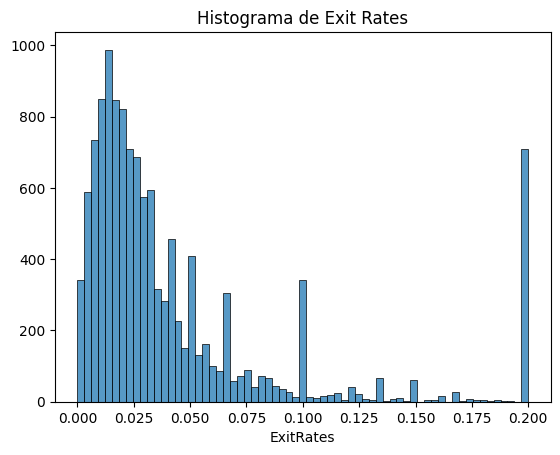

In [5]:
import seaborn as sns

sns.histplot(x=dataset_compras["ExitRates"])
plt.title("Histograma de Exit Rates")
plt.ylabel("")
plt.show()

#### interpretando el histograma de ExitRates.
la interpretacion que sacamos de este histograma es que se concentran los datos extraidos entre el 0 y el 0.025, esto implicaria que:
las sesiones por lo general conducen a mas navegacion y no terminan su estadia en el sitio alli.

por otro lado tambien observamos un pico en 0.200 lo que significa que existen paginas con una alta tasa de salida y existen al rededor de 700 
sesiones que visitan estas paginas.

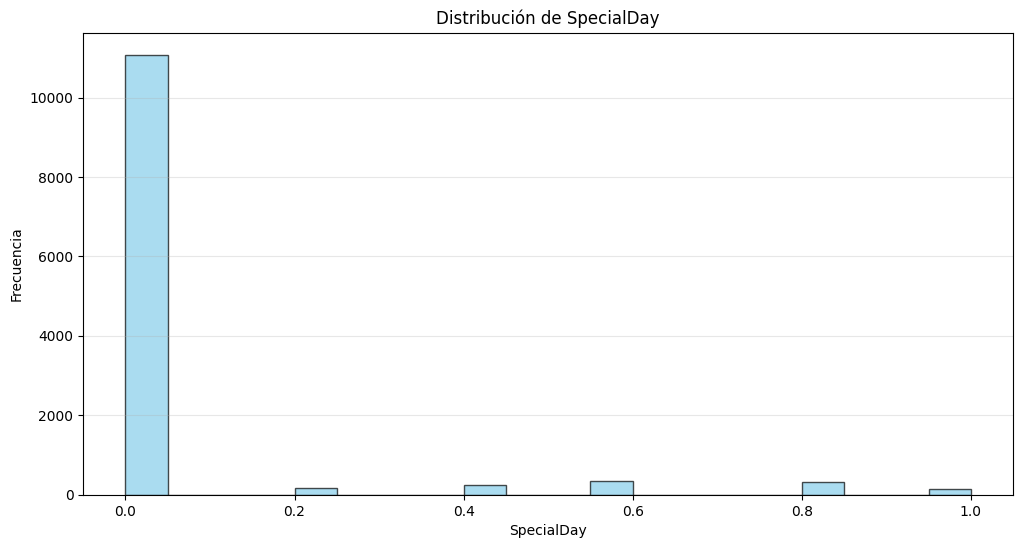

In [6]:
plt.figure(figsize=(12, 6))

# Histograma con escala logarítmica en el eje Y
plt.hist(dataset_compras["SpecialDay"], bins=20, alpha=0.7, color="skyblue", edgecolor="black")
plt.xlabel("SpecialDay")
plt.ylabel("Frecuencia")
plt.title("Distribución de SpecialDay")
plt.grid(axis="y", alpha=0.3)
plt.show()

#### interpretando el grafico de SpecialDay.
La inmensa mayoria de las sesiones, ocurren en un dia Festivo, o en un dia anterior o posterior al dia Festivo.
el analisis de los valores de esta variable SpecialDay lo obtuvimos al realizar un estudio del dominio y de quien extrajo los datos, por eso
concluimos que la distribucion esta sesgada a derecha...

In [7]:

# Estadísticos de ProductRelated_Duration
pr_duration = dataset_compras["ProductRelated_Duration"]

print("Media:", pr_duration.mean())
print("Mediana:", pr_duration.median())
print("Desviación estándar:", pr_duration.std())
print("Mínimo:", pr_duration.min())
print("Máximo:", pr_duration.max())
print("Percentiles:")
print(pr_duration.quantile([0.25, 0.5, 0.75]))


Media: 1194.7462199688268
Mediana: 598.9369047499999
Desviación estándar: 1913.6692878720035
Mínimo: 0.0
Máximo: 63973.52223
Percentiles:
0.25     184.137500
0.50     598.936905
0.75    1464.157214
Name: ProductRelated_Duration, dtype: float64


#### interpretando datos estadisticos de ProductRelated_Duration
Notamos por la distribucion de la variable que el 75% de las sesiones pasan 23 minutos o menos (1400 segundos aprox) en paginas web
relacionadas a producto

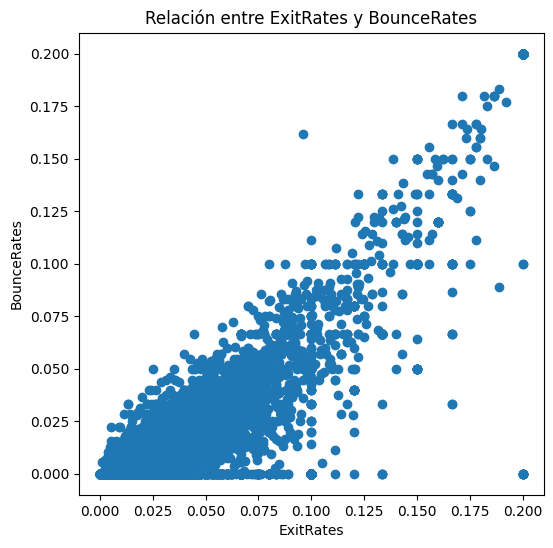

In [8]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(dataset_compras["ExitRates"], dataset_compras["BounceRates"])

# Agregar etiquetas a los ejes
plt.xlabel("ExitRates")
plt.ylabel("BounceRates")

# Agregar un título al gráfico
plt.title("Relación entre ExitRates y BounceRates")

# Mostrar el gráfico
plt.show()

In [9]:

# Cargar el dataset
df = dataset_compras

# Definir los bins para discretizar
bins = [0, 0.05, 0.1, 1.0]
labels = ['Bajo', 'Medio', 'Alto']

# Discretizar las variables
df['BounceRates_cat'] = pd.cut(df['BounceRates'], bins=bins, labels=labels, include_lowest=True)
df['ExitRates_cat'] = pd.cut(df['ExitRates'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de contingencia
contingency_table = pd.crosstab(
    df['BounceRates_cat'],
    df['ExitRates_cat'],
    margins=True,      # Agrega totales
    margins_name='Total'
)

print("BounceRates vs ExitRates")


# Opcional: Mostrar como porcentajes del total
contingency_pct = pd.crosstab(
    df['BounceRates_cat'],
    df['ExitRates_cat'],
    normalize='all'
).round(4) * 100

print("\nTabla de contingencia (% del total):")
print(contingency_pct)

BounceRates vs ExitRates

Tabla de contingencia (% del total):
ExitRates_cat     Bajo  Medio  Alto
BounceRates_cat                    
Bajo             77.09  11.82  0.41
Medio             0.05   2.00  2.00
Alto              0.00   0.02  6.60


#### interpretando el scatter-plot...
Nosotros pensamos que cuando un usuario visita una pagina, y en su navegacion(sesion) continua visitando otras paginas; baja probabilidad de ExitRate en la sesion deberia estar relacionado con la metrica que se toma para BounceRate.

Notamos que existen muchas sesiones donde hay un bajo porcentaje de ExitRates (es decir que la sesion tiende a seguir activa en otras paginas adyacentes) y tambien un muy aproximado porcentaje de BounceRates(sesiones en las cuales no se finaliza en la primer pagina que se visito.)
La alta correlacion entre ambas variables nos informa una relacion casi lineal entre ellas. A medida de que el porcentaje de ExitRates aumenta, el BounceRate tambien lo hace.



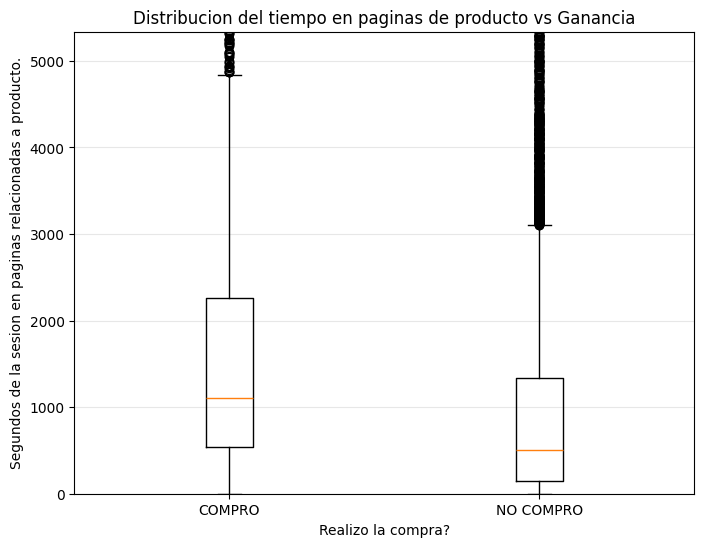

In [10]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot( [dataset_compras[dataset_compras["Revenue"] == True]["ProductRelated_Duration"],
             dataset_compras[dataset_compras["Revenue"] == False]["ProductRelated_Duration"]],
             tick_labels=["COMPRO", "NO COMPRO"])

# Agregar etiquetas a los ejes
plt.xlabel("Realizo la compra?")
plt.ylabel("Segundos de la sesion en paginas relacionadas a producto.")

# Agregar un título al gráfico
plt.title("Distribucion del tiempo en paginas de producto vs Ganancia")

# Limitar el eje Y para enfocarse en las cajas (excluir outliers extremos)
Q1_compro = dataset_compras[dataset_compras["Revenue"] == True]["ProductRelated_Duration"].quantile(0.25)
Q3_compro = dataset_compras[dataset_compras["Revenue"] == True]["ProductRelated_Duration"].quantile(0.75)
IQR_compro = Q3_compro - Q1_compro

Q1_no_compro = dataset_compras[dataset_compras["Revenue"] == False]["ProductRelated_Duration"].quantile(0.25)
Q3_no_compro = dataset_compras[dataset_compras["Revenue"] == False]["ProductRelated_Duration"].quantile(0.75)
IQR_no_compro = Q3_no_compro - Q1_no_compro

# Tomar el máximo entre los dos límites superiores de las cajas
limite_superior = max(Q3_compro + 1.5 * IQR_compro, Q3_no_compro + 1.5 * IQR_no_compro)

plt.ylim(0, limite_superior * 1.1)
plt.grid(axis="y", alpha=0.3)
plt.show()


#### analizando el grafico de plots...
Pensamos que podrian estar relacionadas las variables ProductRelated_Duration y Revenue siguiendo la siguiente hipotesis:
A mayor tiempo de una sesion visitando una pagina relacionada a producto, mayor es la probabilidad de que se realice la compra y se obtenga una ganancia.

### Comienzo de limpieza y pre-procesamiento de los datos.

In [11]:
def detectar_inconsistencias(dataset):
    """
    Detecta inconsistencias entre páginas visitadas y duraciones
    """
    print("🔍 DETECCIÓN DE INCONSISTENCIAS EN EL DATASET")
    print("="*60)
    
    # 1. INCONSISTENCIAS EN ADMINISTRATIVE
    print("\n📊 1. INCONSISTENCIAS EN ADMINISTRATIVE:")
    print("-" * 40)
    
    # Caso A: Administrative=0 pero Duration>0 (INCONSISTENTE)
    incons_admin_1 = (dataset['Administrative'] == 0) & (dataset['Administrative_Duration'] > 0)
    count_1 = incons_admin_1.sum()
    print(f"• Administrative=0 Y Administrative_Duration>0: {count_1} registros")
    
    if count_1 > 0:
        print(f"  📈 Duración promedio: {dataset[incons_admin_1]['Administrative_Duration'].mean():.2f}")
        print(f"  📊 Duración máxima: {dataset[incons_admin_1]['Administrative_Duration'].max():.2f}")
    
    # Caso B: Administrative>0 pero Duration=0 (POSIBLE INCONSISTENCIA)
    incons_admin_2 = (dataset['Administrative'] > 0) & (dataset['Administrative_Duration'] == 0)
    count_2 = incons_admin_2.sum()
    print(f"• Administrative>0 Y Administrative_Duration=0: {count_2} registros")
    
    # 2. INCONSISTENCIAS EN INFORMATIONAL
    print("\n📊 2. INCONSISTENCIAS EN INFORMATIONAL:")
    print("-" * 40)
    
    # Caso A: Informational=0 pero Duration>0 (INCONSISTENTE)
    incons_info_1 = (dataset['Informational'] == 0) & (dataset['Informational_Duration'] > 0)
    count_info_1 = incons_info_1.sum()
    print(f"• Informational=0 Y Informational_Duration>0: {count_info_1} registros")
    
    if count_info_1 > 0:
        print(f"  📈 Duración promedio: {dataset[incons_info_1]['Informational_Duration'].mean():.2f}")
    
    # Caso B: Informational>0 pero Duration=0 (POSIBLE INCONSISTENCIA)
    incons_info_2 = (dataset['Informational'] > 0) & (dataset['Informational_Duration'] == 0)
    count_info_2 = incons_info_2.sum()
    print(f"• Informational>0 Y Informational_Duration=0: {count_info_2} registros")
    
    # 3. INCONSISTENCIAS EN PRODUCTRELATED
    print("\n📊 3. INCONSISTENCIAS EN PRODUCTRELATED:")
    print("-" * 40)
    
    # Caso A: ProductRelated=0 pero Duration>0 (INCONSISTENTE)
    incons_prod_1 = (dataset['ProductRelated'] == 0) & (dataset['ProductRelated_Duration'] > 0)
    count_prod_1 = incons_prod_1.sum()
    print(f"• ProductRelated=0 Y ProductRelated_Duration>0: {count_prod_1} registros")
    
    if count_prod_1 > 0:
        print(f"  📈 Duración promedio: {dataset[incons_prod_1]['ProductRelated_Duration'].mean():.2f}")
        print(f"  📊 Duración máxima: {dataset[incons_prod_1]['ProductRelated_Duration'].max():.2f}")
    
    # Caso B: ProductRelated>0 pero Duration=0 (POSIBLE INCONSISTENCIA)
    incons_prod_2 = (dataset['ProductRelated'] > 0) & (dataset['ProductRelated_Duration'] == 0)
    count_prod_2 = incons_prod_2.sum()
    print(f"• ProductRelated>0 Y ProductRelated_Duration=0: {count_prod_2} registros")
    
    # 4. RESUMEN GENERAL
    print("\n🎯 RESUMEN DE INCONSISTENCIAS:")
    print("-" * 40)
    total_inconsistencias = count_1 + count_2 + count_info_1 + count_info_2 + count_prod_1 + count_prod_2
    print(f"• Total de registros inconsistentes: {total_inconsistencias}")
    print(f"• Porcentaje del dataset: {(total_inconsistencias/len(dataset))*100:.2f}%")
    
    return {
        'incons_admin_1': incons_admin_1,
        'incons_admin_2': incons_admin_2,
        'incons_info_1': incons_info_1,
        'incons_info_2': incons_info_2,
        'incons_prod_1': incons_prod_1,
        'incons_prod_2': incons_prod_2
    }

def mostrar_ejemplos_inconsistentes(dataset, inconsistencias):
    """
    Muestra ejemplos de registros inconsistentes
    """
    print("\n📋 EJEMPLOS DE REGISTROS INCONSISTENTES:")
    print("="*60)
    
    # Combinar todas las inconsistencias
    todas_inconsistencias = (
        inconsistencias['incons_admin_1'] | inconsistencias['incons_admin_2'] |
        inconsistencias['incons_info_1'] | inconsistencias['incons_info_2'] |
        inconsistencias['incons_prod_1'] | inconsistencias['incons_prod_2']
    )
    
    registros_inconsistentes = dataset[todas_inconsistencias]
    
    if len(registros_inconsistentes) > 0:
        print(f"Mostrando {min(10, len(registros_inconsistentes))} ejemplos:")
        
        # Columnas relevantes para mostrar
        columnas_relevantes = [
            'Administrative', 'Administrative_Duration',
            'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration',
            'PageValues', 'Revenue'
        ]
        
        display(registros_inconsistentes[columnas_relevantes].head(10))
        
        # Análisis adicional
        print(f"\n📈 COMPORTAMIENTO DE USUARIOS INCONSISTENTES:")
        compras_inconsistentes = registros_inconsistentes['Revenue'].sum()
        print(f"• Compras realizadas: {compras_inconsistentes}")
        print(f"• Tasa de conversión: {(compras_inconsistentes/len(registros_inconsistentes))*100:.2f}%")
    else:
        print("✅ No hay registros inconsistentes")

def analizar_patrones_temporales(dataset, inconsistencias):
    """
    Analiza patrones en las duraciones inconsistentes
    """
    print("\n⏰ ANÁLISIS DE PATRONES TEMPORALES:")
    print("="*50)
    
    for tipo, mascara in inconsistencias.items():
        if mascara.sum() > 0:
            if 'admin' in tipo:
                duracion = 'Administrative_Duration'
            elif 'info' in tipo:
                duracion = 'Informational_Duration'
            elif 'prod' in tipo:
                duracion = 'ProductRelated_Duration'
            else:
                continue
                
            datos = dataset[mascara][duracion]
            print(f"\n{tipo}:")
            print(f"  • Mínimo: {datos.min():.2f}")
            print(f"  • Máximo: {datos.max():.2f}")
            print(f"  • Promedio: {datos.mean():.2f}")
            print(f"  • Mediana: {datos.median():.2f}")

# EJECUTAR EL ANÁLISIS
print("🎯 INICIO DEL ANÁLISIS DE INCONSISTENCIAS")
print("="*60)

# Ejecutar detección
inconsistencias = detectar_inconsistencias(dataset_compras)

# Mostrar ejemplos
mostrar_ejemplos_inconsistentes(dataset_compras, inconsistencias)

# Análisis de patrones
analizar_patrones_temporales(dataset_compras, inconsistencias)

print("\n" + "="*60)
print("✅ ANÁLISIS COMPLETADO")



🎯 INICIO DEL ANÁLISIS DE INCONSISTENCIAS
🔍 DETECCIÓN DE INCONSISTENCIAS EN EL DATASET

📊 1. INCONSISTENCIAS EN ADMINISTRATIVE:
----------------------------------------
• Administrative=0 Y Administrative_Duration>0: 0 registros
• Administrative>0 Y Administrative_Duration=0: 135 registros

📊 2. INCONSISTENCIAS EN INFORMATIONAL:
----------------------------------------
• Informational=0 Y Informational_Duration>0: 0 registros
• Informational>0 Y Informational_Duration=0: 226 registros

📊 3. INCONSISTENCIAS EN PRODUCTRELATED:
----------------------------------------
• ProductRelated=0 Y ProductRelated_Duration>0: 0 registros
• ProductRelated>0 Y ProductRelated_Duration=0: 717 registros

🎯 RESUMEN DE INCONSISTENCIAS:
----------------------------------------
• Total de registros inconsistentes: 1078
• Porcentaje del dataset: 8.74%

📋 EJEMPLOS DE REGISTROS INCONSISTENTES:
Mostrando 10 ejemplos:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,Revenue
0,0,0.0,0,0.0,1,0.00,0.000000,False
2,0,0.0,0,0.0,1,0.00,0.000000,False
6,0,0.0,0,0.0,1,0.00,0.000000,False
7,1,0.0,0,0.0,0,0.00,0.000000,False
16,0,0.0,0,0.0,1,0.00,0.000000,False
21,0,0.0,0,0.0,2,0.00,0.000000,False
24,0,0.0,0,0.0,1,0.00,0.000000,False
29,1,6.0,1,0.0,45,1582.75,54.179764,False
49,0,0.0,0,0.0,1,0.00,0.000000,False
50,0,0.0,0,0.0,1,0.00,0.000000,False



📈 COMPORTAMIENTO DE USUARIOS INCONSISTENTES:
• Compras realizadas: 88
• Tasa de conversión: 8.23%

⏰ ANÁLISIS DE PATRONES TEMPORALES:

incons_admin_2:
  • Mínimo: 0.00
  • Máximo: 0.00
  • Promedio: 0.00
  • Mediana: 0.00

incons_info_2:
  • Mínimo: 0.00
  • Máximo: 0.00
  • Promedio: 0.00
  • Mediana: 0.00

incons_prod_2:
  • Mínimo: 0.00
  • Máximo: 0.00
  • Promedio: 0.00
  • Mediana: 0.00

✅ ANÁLISIS COMPLETADO


In [12]:
# Encontrar TODOS los registros duplicados exactos
duplicados_exactos = dataset_compras[dataset_compras.duplicated(keep=False)]

print(f"📊 Registros duplicados exactos: {len(duplicados_exactos)}")
print(f"🔢 Representan el {(len(duplicados_exactos)/len(dataset_compras))*100:.2f}% del total")

if not duplicados_exactos.empty:
    print("\n🎯 Registros duplicados (exactamente iguales en todas las columnas):")
    display(duplicados_exactos.head(10))
else:
    print("✅ No hay registros exactamente duplicados")

📊 Registros duplicados exactos: 201
🔢 Representan el 1.63% del total

🎯 Registros duplicados (exactamente iguales en todas las columnas):


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,BounceRates_cat,ExitRates_cat
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False,Alto,Alto
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False,Alto,Alto
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False,Alto,Alto
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False,Alto,Alto
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False,Alto,Alto
252,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,False,False,Alto,Alto
286,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False,Alto,Alto
293,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False,Alto,Alto
298,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,8,1,Returning_Visitor,False,False,Alto,Alto
330,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False,Alto,Alto
